# HW 1 - Building a network from scratch

* x1, x2, x3 = (1, 2, -1)
* Weights have been initated with 1. value
* Biases have been initated with 0 value
* The reuqired network must include 2 hidden layers, with 2 neurons in each layer
* One dimension output layer
* true y value = 1


# Loading required packages 

In [ ]:
import pandas as pd
import numpy as np
import numpy.typing as npt

# Utils functions

In [163]:
def ReLU(x):
    return np.clip(x, 0, None)

def d_ReLU(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def loss(y_pred: npt.ArrayLike, y_true: npt.ArrayLike):
    return ((y_pred - y_true) ** 2).mean()

def d_loss(y_pred: npt.ArrayLike, y_true: npt.ArrayLike):
    n = y_true.shape[0]
    gradient = 2. * (y_pred - y_true) / n
    return gradient

# The *Layer* class - OOP

 * The learning rate is set to 0.01
 * The activation function is ReLU

In [175]:
class Layer:

    activationFunctions = {
        'ReLU': (ReLU, d_ReLU)
    }
    
    lr = 0.1
    
    def __init__(self, neurons: int, inputs: int, activation: str = 'ReLU'):
        """
        The layer instance should be initiated with the input count and number of neurons.
        """
        self.W = np.ones((neurons, inputs))
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)
        
    def forward(self, A_prev: npt.ArrayLike) -> npt.ArrayLike:
        """
        Each forward step will calculate the next layer neurin as a function of its prev input and current 
        weight dot product, on top of that, the activation function will be applied.
        """
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A
        
    def backprop(self, dA: npt.ArrayLike) -> npt.ArrayLike:
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)
        
        self.W = self.W - self.lr * dW
        self.b = self.b - self.lr * db
        
        return dA_prev

In [172]:
# Given inputs

x_train = np.array([[1.0], [2.0], [-1.0]])
y_train = np.array([[0]]) 

m = 1
epochs = 10

layers = [Layer(2, 3, 'ReLU'), Layer(2, 2, 'ReLU')]
costs = []

for epoch in range(epochs):
    # FORWARD
    A = x_train
    for layer in layers:
        A = layer.forward(A)
    
    # COSTS
    cost = loss(y_train, A)
    costs.append(cost)
    
    # BACKPROP
    dA = d_loss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

        
        


/var/folders/lp/6r5p1rqs5kn81svbrkhbrjcc0000gn/T/ipykernel_50832/557082291.py:10: RuntimeWarning: overflow encountered in square
  return ((y_pred - y_true) ** 2).mean()


In [171]:
A

array([[inf],
       [inf]])

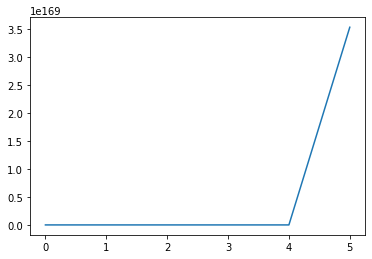

In [170]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)

In [132]:
np.dot(np.ones((2, 3)), x_train)

array([[2.],
       [2.]])

In [126]:
print(np.random.randn(3 , 2))

print()

[[ 1.79465923 -1.14967739]
 [ 0.7134093   0.97064347]
 [ 0.06965023  1.03961191]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [32]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()
    
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient
    

class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(num_hidden)

    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        return output

    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis=0)
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [73]:
from typing import Tuple

class MSE:
    def __call__(self, y_pred: npt.ArrayLike, y_true: npt.ArrayLike):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()
    
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient
    
class Net:
    def __init__(self, input_dim: int = 3, num_hidden: int = 2):
        self.weights = np.ones((input_dim, num_hidden))
        self.bias = np.zeros(num_hidden)
    
    def __call__(self, x):
        self.x = x.T
        output = x.T @ self.weights + self.bias
        return output
    
    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis=0)
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
    
    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient
        
class Relu:
    def __call__(self, input_):
        self.input = input_
        self.output = np.clip(self.input__, 0, None)
        return self.output
    
    def backward(self, output_gradient):
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient

In [74]:
x = np.array([[1,], [2,], [-1,]])
y_true = np.zeros(1)

num_epochs = 10
lr = 0.1

loss = MSE()
net = Net(x.shape[0])

for epoch in range(num_epochs):
    y_pred = net(x)

In [75]:
y_pred

array([[2., 2.]])

In [70]:
net.weights

x.T @ np.ones((3, 2))

array([[2., 2.]])

3

In [21]:
np.array([1, 1])

array([1, 1])